# Importing Libraries and Data

In [15]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("digital_wallet_transactions.csv")
df.head()

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idx                 5000 non-null   int64  
 1   transaction_id      5000 non-null   object 
 2   user_id             5000 non-null   object 
 3   transaction_date    5000 non-null   object 
 4   product_category    5000 non-null   object 
 5   product_name        5000 non-null   object 
 6   merchant_name       5000 non-null   object 
 7   product_amount      5000 non-null   float64
 8   transaction_fee     5000 non-null   float64
 9   cashback            5000 non-null   float64
 10  loyalty_points      5000 non-null   int64  
 11  payment_method      5000 non-null   object 
 12  transaction_status  5000 non-null   object 
 13  merchant_id         5000 non-null   object 
 14  device_type         5000 non-null   object 
 15  location            5000 non-null   object 
dtypes: flo

# EDA

In [18]:
# Standardize datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_month'] = df['transaction_date'].dt.to_period('M')

In [19]:
# Statistics Summary
df.describe(include='all')

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location,transaction_month
count,5000.000000,5000,5000,5000,5000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000,5000,5000,5000
unique,NaN,5000,3932,NaN,20,100,97,NaN,NaN,NaN,NaN,5,3,987,3,3,13
top,NaN,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05939,NaN,Streaming Service,Python Programming Course,Airbnb,NaN,NaN,NaN,NaN,Bank Transfer,Successful,MERCH_0376,Android,Urban,2024-05
freq,NaN,1,4,NaN,299,80,106,NaN,NaN,NaN,NaN,1045,4755,14,2995,3485,447
mean,2500.500000,NaN,NaN,2024-02-19 09:33:10.500000,NaN,NaN,NaN,4957.502722,25.188874,50.658782,498.790400,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,2023-08-19 03:32:00,NaN,NaN,NaN,10.090000,0.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1250.750000,NaN,NaN,2023-11-19 14:07:45,NaN,NaN,NaN,2453.977500,12.665000,26.495000,246.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2500.500000,NaN,NaN,2024-02-20 08:42:30,NaN,NaN,NaN,4943.685000,25.070000,51.390000,504.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,3750.250000,NaN,NaN,2024-05-22 07:14:15,NaN,NaN,NaN,7444.815000,37.947500,75.067500,749.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,5000.000000,NaN,NaN,2024-08-18 01:15:00,NaN,NaN,NaN,9996.950000,49.990000,100.000000,999.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Check for null
df.isnull().sum()

idx                   0
transaction_id        0
user_id               0
transaction_date      0
product_category      0
product_name          0
merchant_name         0
product_amount        0
transaction_fee       0
cashback              0
loyalty_points        0
payment_method        0
transaction_status    0
merchant_id           0
device_type           0
location              0
transaction_month     0
dtype: int64

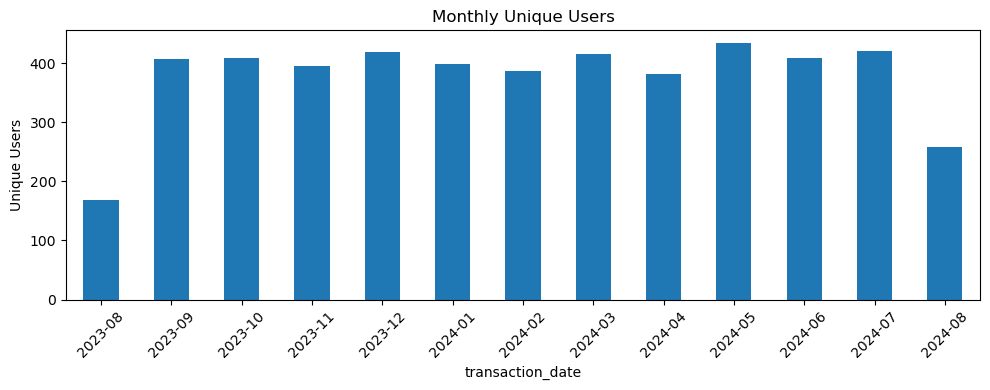

In [31]:
# Monthly unique user count 
monthly_users = df.groupby(df['transaction_date'].dt.to_period('M'))['user_id'].nunique()
monthly_users.plot(kind='bar', figsize=(10, 4), title='Monthly Unique Users')
plt.ylabel('Unique Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Number of unique user show a stable trend throughout the observation period, mostly fluctuating at around 400 unique users per month. 
However, the numbers of unique users are significantly low in August of both 2023 and 2024. This sudden drop might signify sign of seasonality, yet there is not enough historical data to drive conclusions.

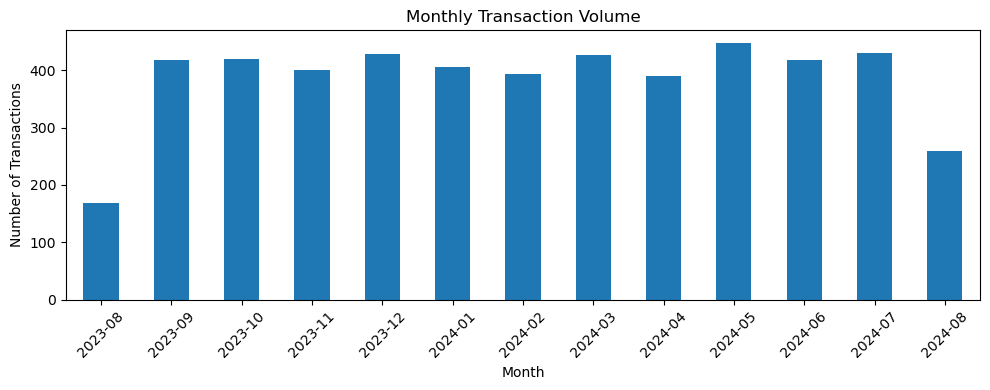

In [37]:
# Monthly transaction volume
plt.figure(figsize=(10, 4))
df['transaction_month'].value_counts().sort_index().plot(kind='bar')
plt.title("Monthly Transaction Volume")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Monthly transaction volume shows strong alignment with number of unique users, indicating consistant transaction behaviours with proportional increases and decreases.  
Nonetheless, the fact that number of transactions closely matches with number of unique customers suggest could mean that each user makes around one transaction per month on average.

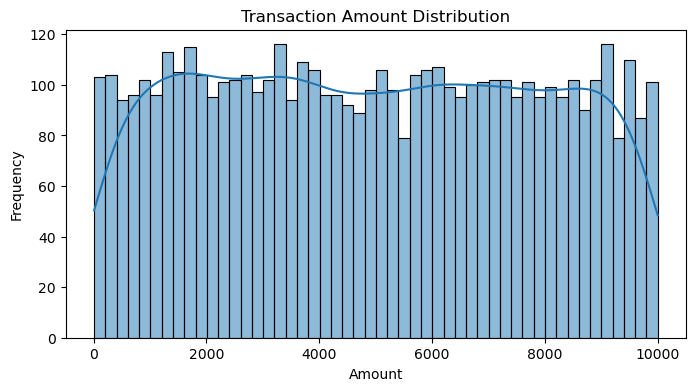

In [21]:
# Transaction amount distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['product_amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

The transaction amount distribution appears relatively uniform. Even though certain fluctuations do exist, there are no specific concentrated range of transaction amount.

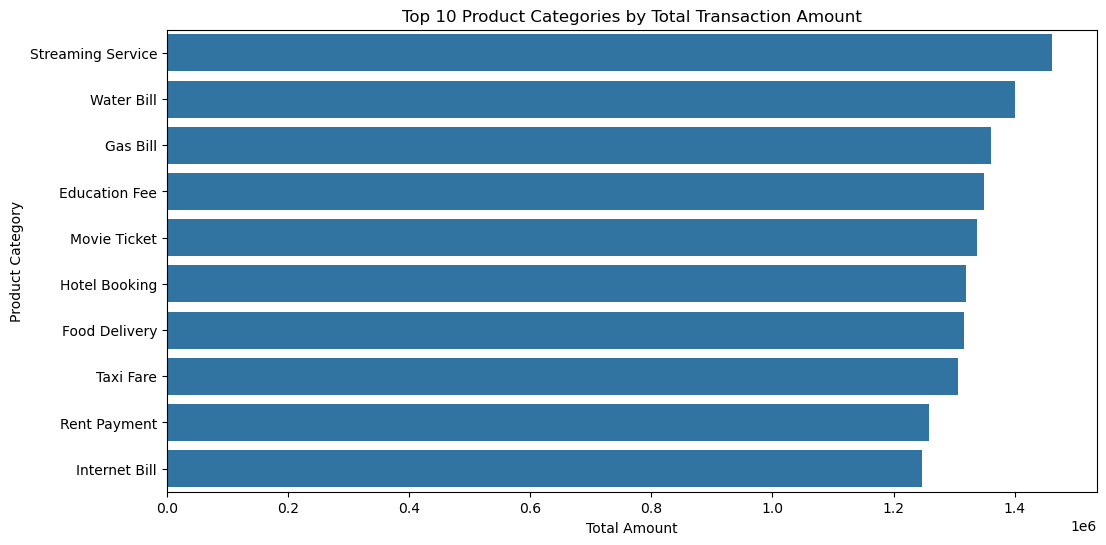

In [43]:
# Top product categories by total transaction amount
plt.figure(figsize=(12, 6))
total_amount = df.groupby('product_category')['product_amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=total_amount.values, y=total_amount.index)
plt.title("Top 10 Product Categories by Total Transaction Amount")
plt.xlabel("Total Amount")
plt.ylabel("Product Category")
plt.show()

Generally, the top 10 product categories have similar value of around 1,200 to 1,400 in transaction amount per payment. 
Notably, a lot of these product categories fall into the utilities and monthly bills segment, therefore users would conduct recurring bills with consistent number of transaction and amount every month. The other highly-spent product category is (normally) occational spending like movie ticket or hotel booking, hence, transactions within this category might be high in amount yet low in frequency.

# Cohort Analysis

## Customer Retention by Month

In [32]:
# Determine each user's first transaction month 
df['cohort_month'] = df.groupby('user_id')['transaction_month'].transform('min')

# Calculate months since the first transaction
def get_month_diff(d1, d2):
    return (d2.year - d1.year) * 12 + (d2.month - d1.month)
df['cohort_index'] = df.apply(lambda row: get_month_diff(row['cohort_month'], row['transaction_month']), axis=1)

# Count number of unique users by cohort and index
cohort_counts = df.groupby(['cohort_month', 'cohort_index'])['user_id'].nunique().reset_index()
cohort_pivot = cohort_counts.pivot(index='cohort_month', columns='cohort_index', values='user_id')

# Compute retention rate
cohort_sizes = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_sizes, axis=0).round(3)

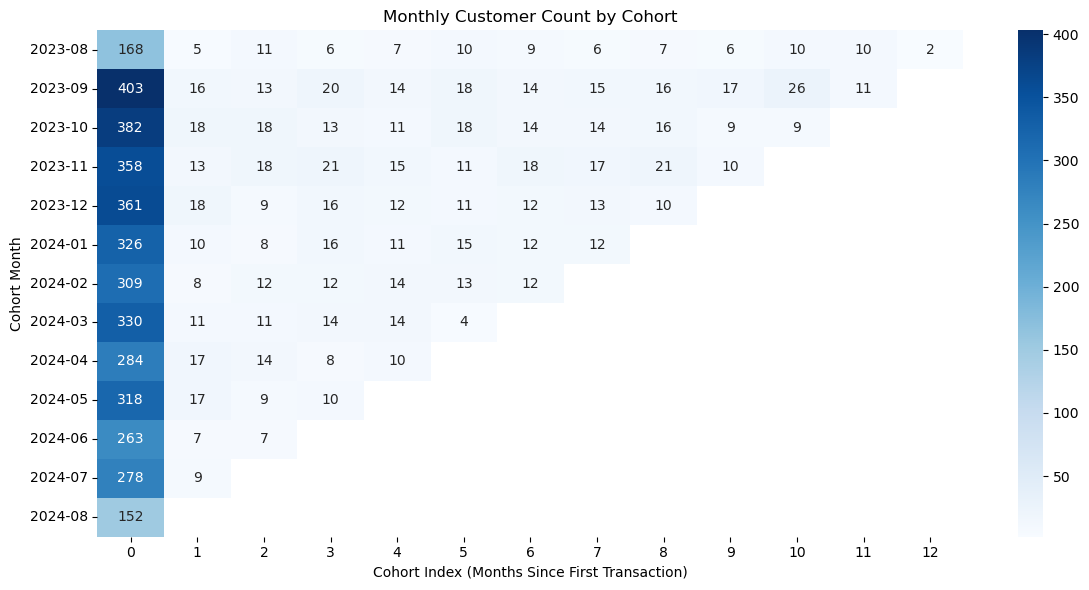

In [33]:
# Number of customers by month
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_pivot, annot=True, fmt='g', cmap='Blues')
plt.title('Monthly Customer Count by Cohort')
plt.xlabel('Cohort Index (Months Since First Transaction)')
plt.ylabel('Cohort Month')
plt.tight_layout()
plt.show()

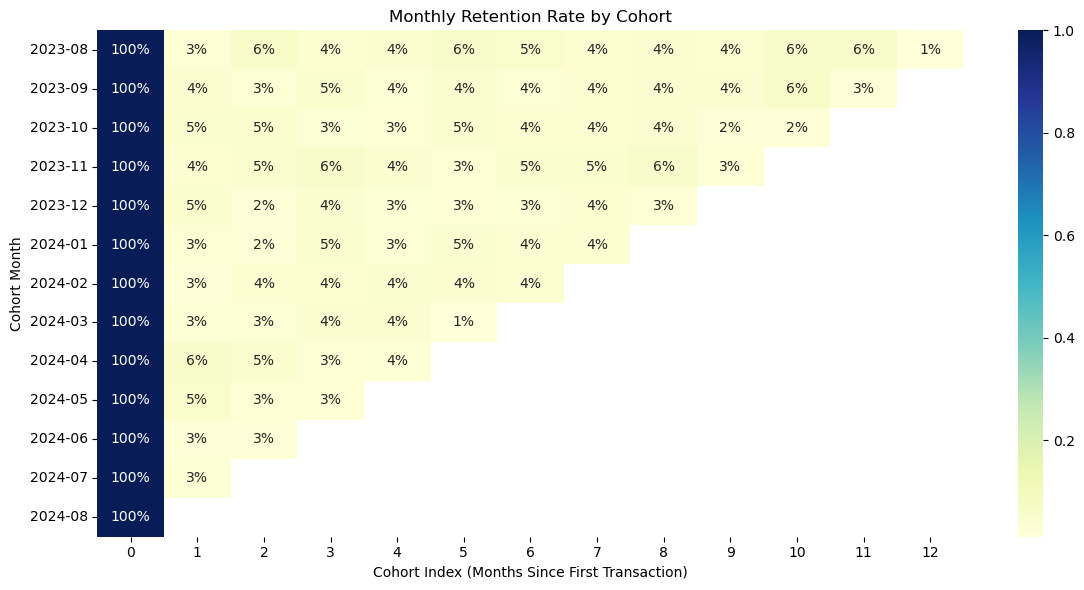

In [34]:
# Customer rtention rate
plt.figure(figsize=(12, 6))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Monthly Retention Rate by Cohort')
plt.xlabel('Cohort Index (Months Since First Transaction)')
plt.ylabel('Cohort Month')
plt.tight_layout()
plt.show()

The fluctuation in the monthly customer count as shown in the heatmap suggest inconsistent customer acquisition throughout the period. Notably, the most recent cohorts (April to August of 2024) are smaller, indicating reduced acquisition. This problem could be attributed to a few common causes such as lower marketing spending, rising competition or service quality.

Monthly retention rate also experienced disappointing figures with significant drop in retention after month 0 despite high transaction amount in recurring bills. All cohorts can only sustain single-digit figures, which mean most users only try this mobile wallet once and did not return. Another trend can be identified is customer retention in the first few months is slightly better, which aligns with customer acquisition trend. This alarming low retention rate is normally due to poor customer experience (on boarding process, in-app journey, UI/UX,...), uncompetitive pricing and discount or inconvenience and disruptions while using the service.

## Transaction Amount Retention by Month

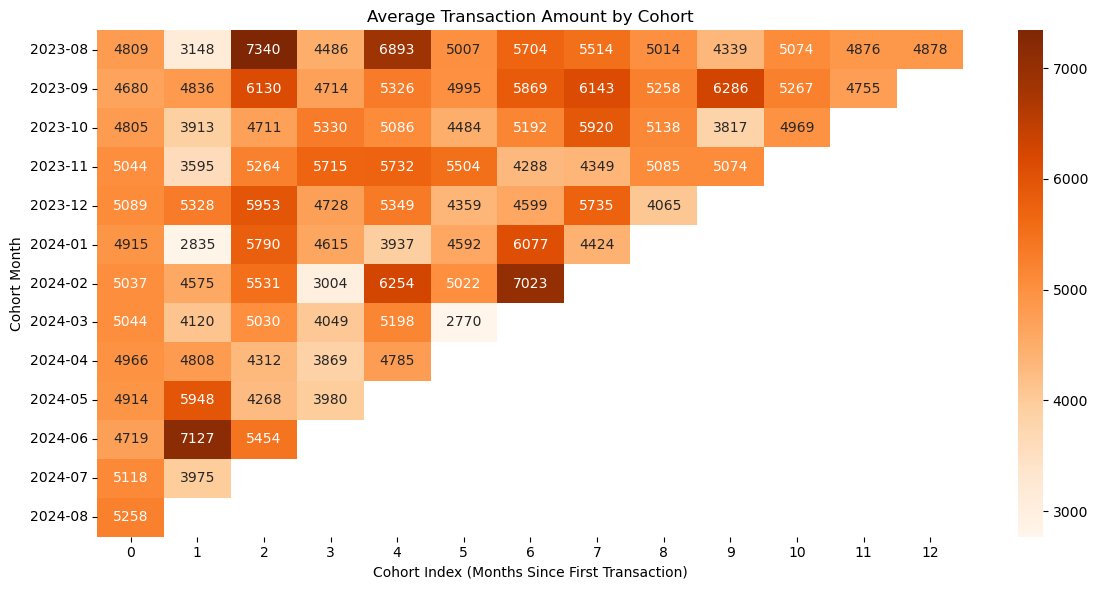

In [35]:
# Compute average transaction amount per user per cohort index
avg_amount_df = df.groupby(['cohort_month', 'cohort_index'])['product_amount'].mean().reset_index()
avg_amount_pivot = avg_amount_df.pivot(index='cohort_month', columns='cohort_index', values='product_amount')

# Average transaction amount using cohort
plt.figure(figsize=(12, 6))
sns.heatmap(avg_amount_pivot, annot=True, fmt='.0f', cmap='Oranges')
plt.title('Average Transaction Amount by Cohort')
plt.xlabel('Cohort Index (Months Since First Transaction)')
plt.ylabel('Cohort Month')
plt.tight_layout()
plt.show()

In general, it can be noticed that customer initial spending this digital wallet is relatively high, ranging from 4800 to 5200 in month 0. In later months, average transaction amount does vary yet 4000 and 5000 are stil the most common figures. The average amount fluctuates across months and cohorts. In some cases, it increases slightly over time over small number of retained users.

This trend suggest that even though customer retention rate is low, retained users tend to be higher-value users who continue to use the wallet for meaningful purchases. Nonetheless, it is hard to confirm since very few users stay long enough to form consistent patterns.

## Category-specific Customer Retention Rate

In [ ]:
# Create cohort-related data grouped by user, cohort, and product category
category_cohort_df = df.groupby(['cohort_month', 'cohort_index', 'product_category'])['user_id'].nunique().reset_index()
category_pivot = category_cohort_df.pivot_table(index=['product_category', 'cohort_month'], 
                                                 columns='cohort_index', 
                                                 values='user_id')

In [ ]:
# Calculate retention rate per category 
category_retention = category_pivot.divide(category_pivot.iloc[:, 0], axis=0).round(3)

In [46]:
# Select top product categories by total transaction amount
top_categories = df.groupby('product_category')['product_amount'].sum().sort_values(ascending=False).head(5)
filtered_retention = category_retention.loc[top_categories.index]

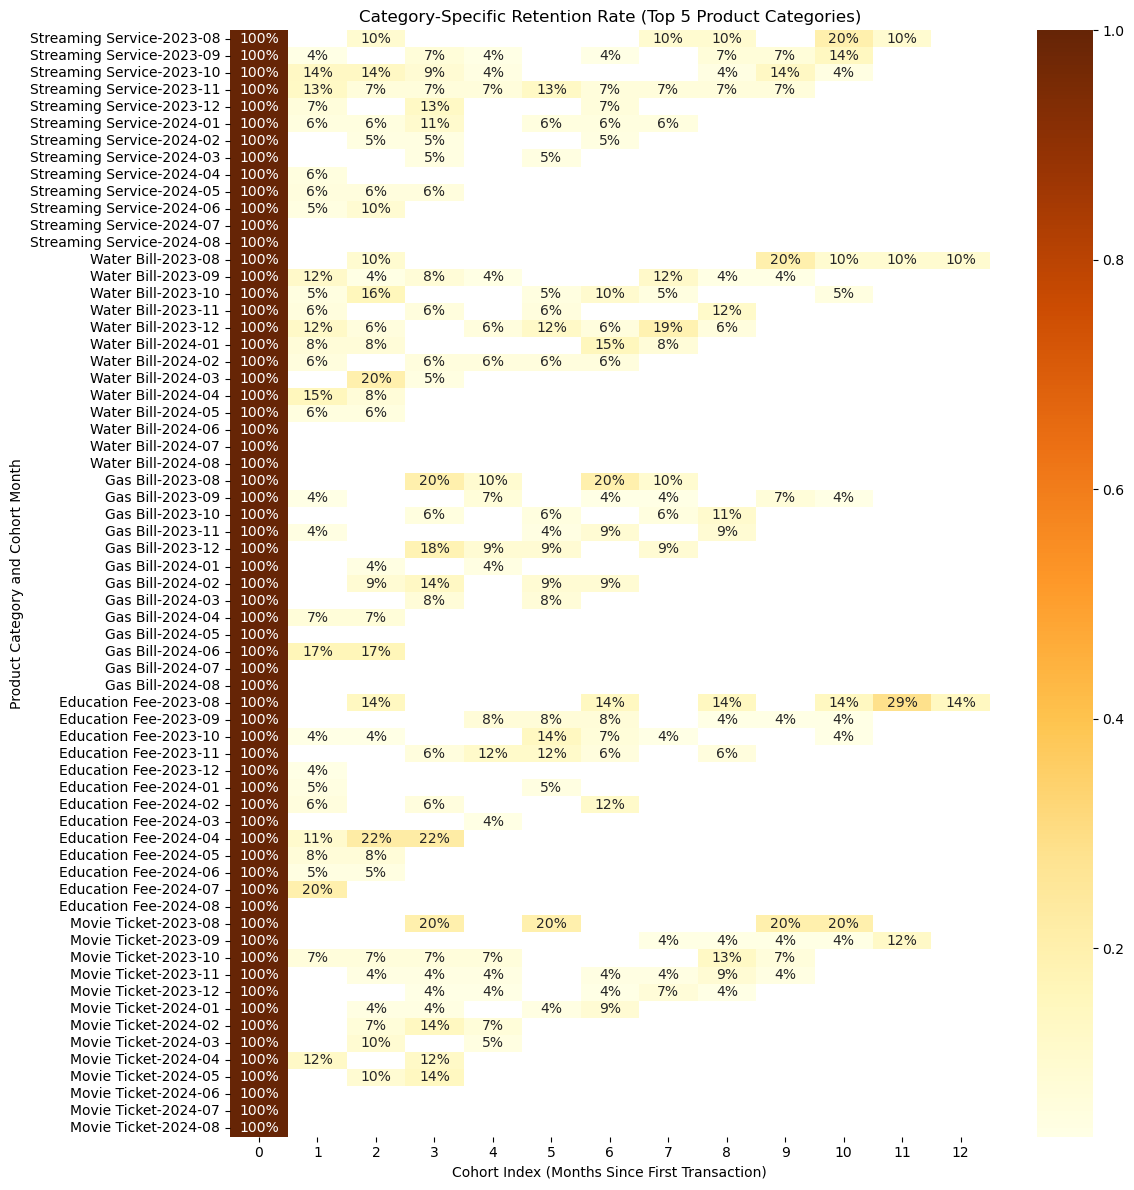

In [48]:
# Plot heatmap of retention by category spending
plt.figure(figsize=(12, 12))
sns.heatmap(filtered_retention, annot=True, fmt='.0%', cmap='YlOrBr')
plt.title('Category-Specific Retention Rate (Top 5 Product Categories)')
plt.xlabel('Cohort Index (Months Since First Transaction)')
plt.ylabel('Product Category and Cohort Month')
plt.tight_layout()
plt.show()

Similar to the overall retention rate, retention rates by product categories all drop sharply after month 0. Additionally, this cohort confirms that higher-value customers are more loyal since retention rates of these chosen categories are generally higher than total retention, meaning that users return to make more transactions. Another point is that higher-value users are seen early on (Month 0) and tend to be the ones that stick around. Besides that, few categories show relatively better retention beyond Month 1, indicating potential for building loyalty (recurring service payments or subscriptions).

#### Recommendation:
Customer retention analysis using cohort of this digital wallet reveals a serious retention and loyalty problem. However, thanks to further analyses on transaction amount and product categories, more insights can be collected and some recommendations can be made.

(1) Improve customer experience in app: The sharp drop in retention after month 0, even among users spending >5000 in initial transactions, suggests that users are willing to try the service but not compelled to return. The problem likely lies in the post-onboarding experience. 
- In order to thoroughly understand the problem, a funnel analysis to identify drop-off points as well as session recordings and in-app analytics to identify painpoint while navigating can be conducted.
- Then, the digital wallet can use insights from analytics to optimize the onboarding experience (e.g. add clearer walk-though guidances, rearrangement of home page,...). Plus, A/B testing should be conducted to identify customers' preffered app navigation and journey.

(2) Focus on higher-value customers and recurring product categories: The cohort on average transaction amount and product category-specific retention shows that retained users tend to be those making larger, possibly recurring purchases (bills, subscriptions, essential services).
- Firstly, the digital wallet team can segment users based on initial month 0 spending and pinpoint the higher-spending group to offer customized retention campaigns from an early stage.
- Additionally, the team can promote and nudge towards recurring-use categories (e.g., electricity bills, transport passes, tuition) through in-app banners and push notifications to steer customers into these categories.
- Lastly, automatic monthly bill payment notifications or calendar nudges can be considered to trigger more consistent habits.

(3) Launch trigger-based engagement campaigns: as analysed previously, most users drop the digital wallet between month 0 and month 1, leaving only a short windows for intervention. Therefore, event-based engagement during this period is necessary.
- A common tactic is to set up event-based triggers (e.g., “user completes a high-value transaction”) to activate personalized re-engagement within 7–14 days.
- Besides that, since some users return in Month 1, a targeted offer on Day 20–25 could catch users before they drop